## Applying Clustering Towards Exploring Hand-written Digits (MNIST dataset)

***Given the unsupervised nature of clustering, every time you run the k-means and hierarchical algorithms you would get slightly different results, which is normal and expected.***

To demonstrate the ML principles on a more interesting problem, let's consider one piece of the optical character recognition problem: the identification of hand-written digits. In the wild, this problem involves both locating and identifying characters in an image. Here we'll take a shortcut and use Scikit-Learn's set of pre-formatted digits, which is built into the library.

### Loading and visualizing the digits data

We'll use Scikit-Learn's data access interface and take a look at this data:

In [4]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import mode
from sklearn.datasets import load_digits


# Load data
digits = load_digits()
digits.images.shape

(1797, 8, 8)

More info on a related dataset:
http://yann.lecun.com/exdb/mnist/

The images data is a three-dimensional array: 1,797 samples each consisting of an 8 × 8 grid of pixels.
Let's visualize the first hundred:

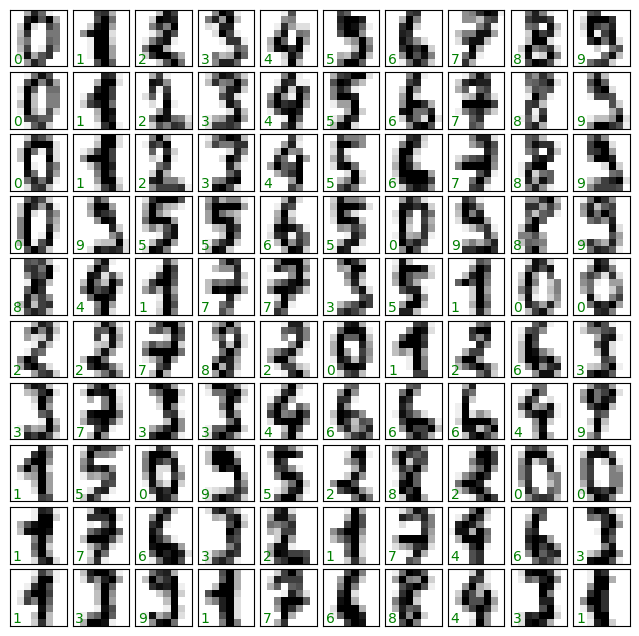

In [5]:
# Visualize some of the data

fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(digits.target[i]),
            transform=ax.transAxes, color='green')

Additionally, we need the target array, which gives the previously determined label for each digit.
These two quantities are built into the digits dataset under the ``data`` and ``target`` attributes, respectively:

In [6]:
X = digits.data

### Your code here: Get the shape of data
### X.your_code
X.shape


(1797, 64)

In [8]:
y = digits.target

### Your code here: Get the shape of targets
### y.your_code
y.shape

(1797,)

We see here that there are 1,797 samples and 64 features.

### K-Means Clustering following PCA

Let's perform the K-Means clustering algorithm after applying PCA to the digits.

In [10]:
# PCA dimensionality reduction

### Your code here: Apply the PCA function with n_components=20 argument
### pca = your_code
pca = PCA(n_components=20)

X_pca = pca.fit_transform(X)

# Apply KMeans clustering following PCA

### Your code here: Apply the KMeans function with n_clusters=10 argument
### kmeans = your_code
kmeans = KMeans(n_clusters=10, random_state=42)

### Your code here: Apply the fit_predict function with the X_pca argument
### clusters = kmeans.your_code
clusters = kmeans.fit_predict(X_pca)

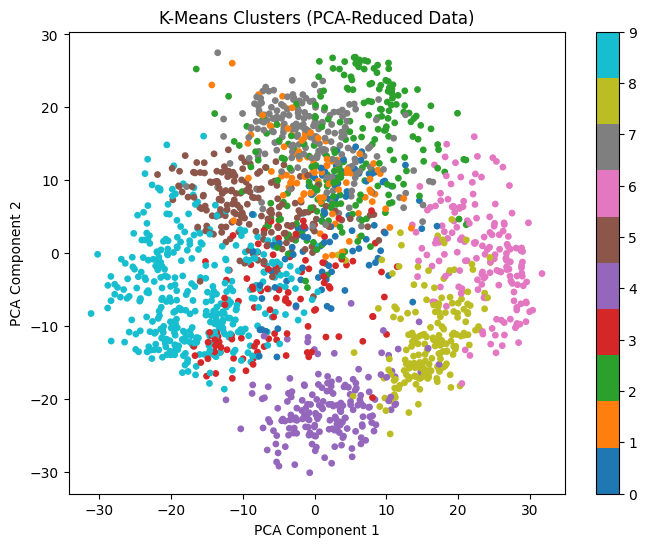

In [11]:
# Plot K-Means clusters

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='tab10', s=15)
plt.title("K-Means Clusters (PCA-Reduced Data)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")

### Your code here: Apply the colorbar function to the plot
### plt.your_code
plt.colorbar()

### Your code here: show the data
### plt.your_code
plt.show()

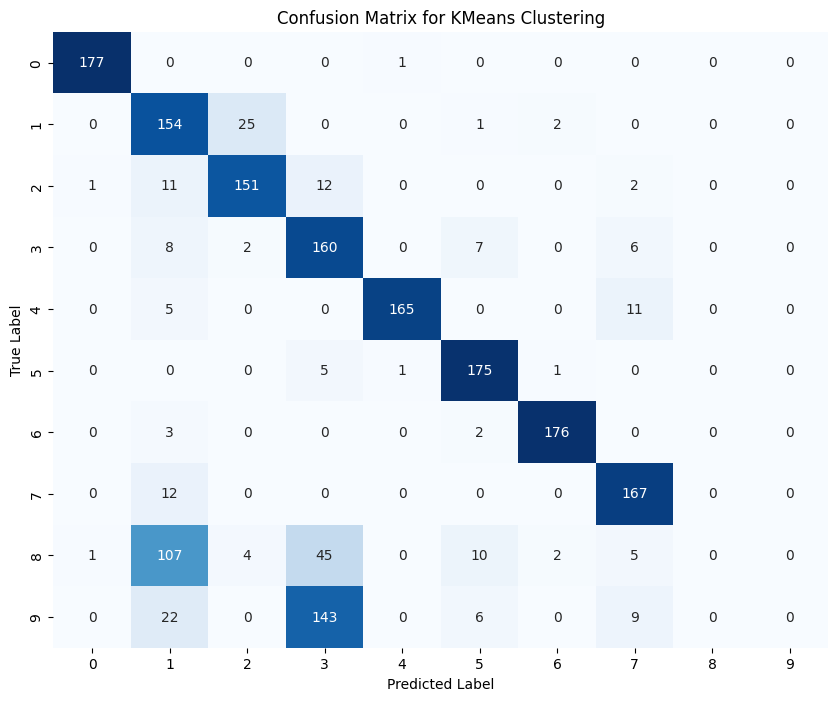


Accuracy based on mapped cluster labels: 0.7373


In [12]:
# Plotting the K-Means Confusion Matrix

labels = np.zeros_like(clusters)

# Iterate through each cluster ID (0-9)
for i in range(10):
    # Get indices of data points belonging to cluster i
    mask = (clusters == i)
    most_common_label = mode(y[mask], keepdims=False)[0]
    # Assign this most common label to all points in cluster i
    labels[mask] = most_common_label

# Calculating and Plotting the Confusion Matrix
cm = confusion_matrix(y, labels)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=digits.target_names, yticklabels=digits.target_names)

plt.title("Confusion Matrix for KMeans Clustering")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

print(f"\nAccuracy based on mapped cluster labels: {accuracy_score(y, labels):.4f}")

### Hierarchical Agglomerative Clustering following PCA

Let's perform the agglomerative clustering algorithm after applying PCA to the digits.

In [13]:
# Hierarchical Clustering (Agglomerative Clustering)

# n_clusters=10 is set to match the number of true digit classes
# linkage='ward' is a common linkage method that minimizes variance within clusters
hierarchical_clustering = AgglomerativeClustering(n_clusters=10, linkage='ward')

### Your code here: Apply the fit_predict function with the X_pca argument
### clusters = hierarchical_clustering.your_code
clusters = hierarchical_clustering.fit_predict(X_pca)

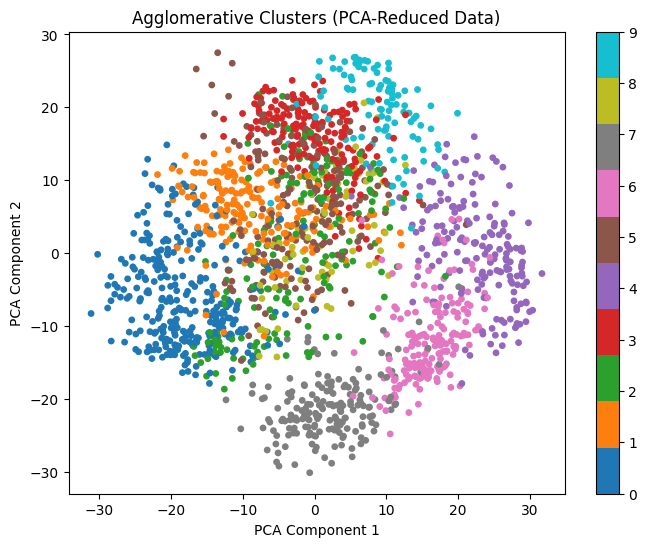

In [14]:
# Plot Agglomerative clusters

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='tab10', s=15)
plt.title("Agglomerative Clusters (PCA-Reduced Data)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")

### Your code here: Apply the colorbar function to the plot
### plt.your_code
plt.colorbar()

### Your code here: Show the data
### plt.your_code
plt.show()

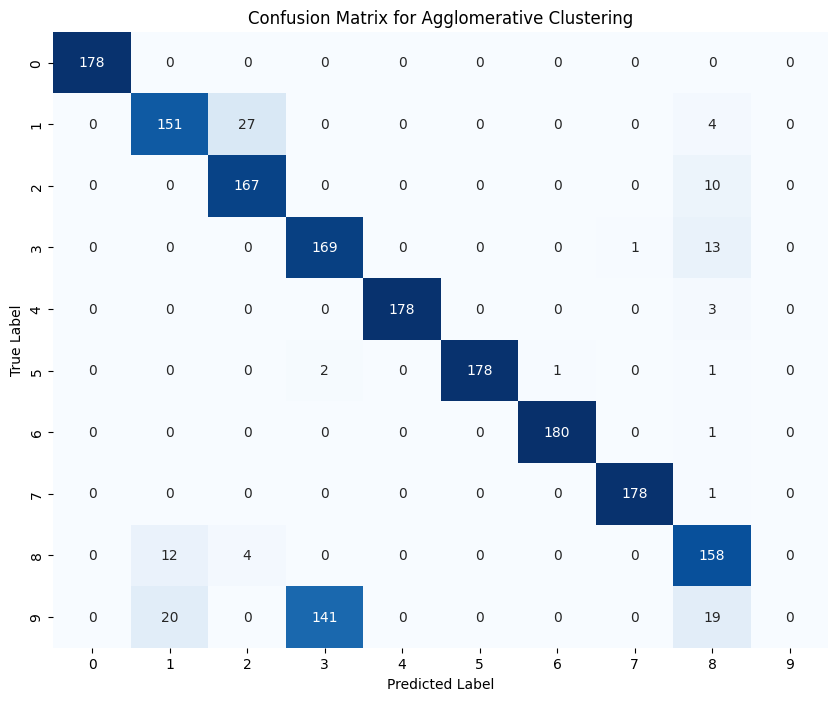


Accuracy based on mapped cluster labels: 0.8553


In [15]:
# Plotting the Agglomerative Confusion Matrix

labels = np.zeros_like(clusters)

# Iterate through each cluster ID (0-9)
for i in range(10):
    # Get indices of data points belonging to cluster i
    mask = (clusters == i)
    most_common_label = mode(y[mask], keepdims=False)[0]
    # Assign this most common label to all points in cluster i
    labels[mask] = most_common_label

# Calculating and Plotting the Confusion Matrix
cm = confusion_matrix(y, labels)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=digits.target_names, yticklabels=digits.target_names)

plt.title("Confusion Matrix for Agglomerative Clustering")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

print(f"\nAccuracy based on mapped cluster labels: {accuracy_score(y, labels):.4f}")